In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import *
import scipy as sp

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

- https://docs.scipy.org/doc/scipy/reference/stats.html
- https://numpy.org/doc/stable/reference/routines.statistics.html
- https://docs.python.org/ko/3/library/math.html#number-theoretic-and-representation-functions

In [5]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col = 'student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [8]:
# 영어 과목 평균
sum(df['english']) / len(df['english'])

58.380

In [9]:
np.mean(df['english'])

58.380

In [10]:
sp.mean(df['english'])

C:\Users\JngMK\AppData\Local\Temp/ipykernel_14516/2012453220.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(df['english'])


58.380

In [13]:
# 기하평균(성장률 평균)
data = [2, 8, 3]
math.prod(data)**(1/len(data))
gmean(data)                     # scipy.stats.gmean(a[, axis, dtype, weights])

3.634

3.634241185664279

In [16]:
# 조화평균(비율 및 변화율에 대한 평균)
data = np.array([80, 120])
1/data
len(data)/np.sum(1/data)
hmean(data)

array([0.013, 0.008])

95.99999999999999

95.99999999999999

In [22]:
# 가중평균
# numpy.average(a[, axis, weights, returned])
np.average(np.arange(1, 5), weights = np.arange(4, 0, -1))
np.average(np.arange(1, 11), weights = np.arange(10, 0, -1))
np.average(np.arange(1, 5))

2.0

4.0

2.5

In [23]:
scores = np.array(df['english'])
# 순서 통계량
sorted_scores = np.sort(scores)
sorted_scores

array([37, 37, 41, 42, 42, 45, 47, 47, 48, 49, 51, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 57, 57, 57, 57, 57, 58, 61, 61, 62, 62, 62, 63, 64, 64,
       65, 65, 65, 65, 66, 66, 66, 67, 68, 69, 70, 70, 71, 73, 75, 79],
      dtype=int64)

In [27]:
# median 계산식
n = len(scores)
if n % 2 == 0:
    x1 = sorted_scores[n//2 - 1]
    x2 = sorted_scores[n//2]
    median = (x1 + x2) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]

median
np.median(scores)
df['english'].median()

57.5

57.5

57.500

In [33]:
np.random.seed(3)
income = np.random.normal(2000000, 500000, 100)
income[:10]

array([2894314.237, 2218254.925, 2048248.734, 1068253.648, 1861305.899,
       1822620.51 , 1958629.259, 1686499.662, 1978090.916, 1761390.985])

In [34]:
np.mean(income)

1945681.4627969689

In [35]:
income = np.append(income, 10**9)

In [36]:
np.mean(income)

11827407.38890789

In [37]:
# 중앙값
np.median(income)

1919743.318406538

In [38]:
# 절사평균
trim_mean(income, 0.2)

1941471.0812132563

In [39]:
np.random.seed(3)
data = np.random.choice('A B C'.split(), 1000)
data[:10]

array(['C', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'C', 'B'], dtype='<U1')

In [42]:
# scipy.stats.mode(a[, axis, nan_policy])
# 최빈값
mode(data)
mode(data).mode
mode(data).count    # 빈도
pd.Series(data).value_counts()
pd.Series(data).value_counts().index[0]
pd.Series(data).value_counts()[0]

ModeResult(mode=array(['A'], dtype='<U1'), count=array([350]))

array(['A'], dtype='<U1')

array([350])

A    350
B    328
C    322
dtype: int64

'A'

350

In [43]:
np.random.seed(123)
data = np.random.normal(100, 20, 1000)
data[:10]

array([ 78.287, 119.947, 105.66 ,  69.874,  88.428, 133.029,  51.466,
        91.422, 125.319,  82.665])

In [44]:
sorted(data)[0], sorted(data)[-1]
np.min(data), np.max(data)

(35.37889984161376, 171.43158436052622)

(35.37889984161376, 171.43158436052622)

In [51]:
# quartile
print('Q1 :', np.percentile(data, 25))
print('Q2 :', np.percentile(data, 50))
print('Q3 :', np.percentile(data, 75))

Q1 : 86.30886819268538
Q2 : 99.17628889574436
Q3 : 113.37731495435875


{'whiskers': [<matplotlib.lines.Line2D at 0x23ab5ba85e0>,
 'caps': [<matplotlib.lines.Line2D at 0x23ab5ba8c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ab5ba8190>],
 'medians': [<matplotlib.lines.Line2D at 0x23ab62563a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ab6256730>],
 'means': []}

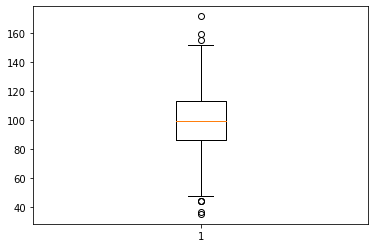

In [52]:
# boxplot
import matplotlib.pyplot as plt
plt.boxplot(data)

In [62]:
print('표본 데이터의 기술통계량 :', describe(data))
print('모집단 데이터의 기술통계량 :', describe(data, ddof=0))
df['english'].describe()

표본 데이터의 기술통계량 : DescribeResult(nobs=1000, minmax=(35.37889984161376, 171.43158436052622), mean=99.20871727838417, variance=401.03130940853094, skewness=-0.029040113501245676, kurtosis=-0.02543852877769215)
모집단 데이터의 기술통계량 : DescribeResult(nobs=1000, minmax=(35.37889984161376, 171.43158436052622), mean=99.20871727838417, variance=400.6302780991224, skewness=-0.029040113501245676, kurtosis=-0.02543852877769215)


count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

In [63]:
# numpy float 출력옵션 변경
# np.set_printoptions(precision=3)
# np.set_printoptions(precision=20, suppress=True)
# pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

In [66]:
# 범위(Range)
np.max(data) - np.min(data)
np.ptp(data)        # numpy.ptp(a[, axis, out, keepdims])

136.05268451891246

136.05268451891246

In [67]:
# 중간 범위(최대값과 최소값의 평균)
(np.max(data)+np.min(data)) / 2

103.40524210106999

In [69]:
# IQR
np.quantile(data, 0.75) - np.quantile(data, 0.25)
iqr(data)

27.06844676167337

27.06844676167337

In [70]:
# 사분위수 편차(quartile deviation)
# IQR/2
(np.quantile(data, 0.75) - np.quantile(data, 0.25)) / 2
(iqr(data)) / 2

13.534223380836686

13.534223380836686

In [77]:
dev = data - np.mean(data)
dev[:20]
# 편차의 합 : 0
s2 = ((dev**2).sum()) / (len(data) - 1)
print('분산 :', s2)
print('표준편차 :', math.sqrt(s2))

array([-20.921, 20.738, 6.451, -29.335, -10.781, 33.820, -47.742, -7.787,
       26.110, -16.544, -12.786, -1.103, 30.619, -11.987, -8.088, -7.896,
       44.910, 44.527, 20.872, 8.515])

분산 : 401.03130940853094
표준편차 : 20.02576613786676


In [78]:
# 분산
x=[1,2,3,4,5]
np.var(x, ddof=1)   # 표본
np.var(x)
np.array(x).var()
pd.Series(x).var()

2.5

2.0

2.0

2.500

In [79]:
# 표준편차
np.std(x)
np.array(x).std()
pd.Series(x).std(ddof =0)   # 모집단

1.4142135623730951

1.4142135623730951

1.414

In [83]:
men = [72,74,77,68,66,75]
women = [45,48,52,53,46,50]
np.std(men, ddof = 1)
np.std(women, ddof = 1)

4.242640687119285

3.22490309931942

In [87]:
# 변동계수
np.std(men, ddof = 1) / np.mean(men)
np.std(women, ddof = 1) / np.mean(women)
variation(men, ddof = 1)
variation(women, ddof = 1)

0.05892556509887895

0.06581434896570246

0.05892556509887895

0.06581434896570246

In [89]:
# 데이터의 정규화
# z-score, min-max scaling
# min-max : s_i = (x_i - min(x)) / max(x) - min(x)
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [92]:
df.describe()

,english,mathematics
count,50.00,50.000
mean,58.38,78.880
std,9.80,8.414
min,37.00,57.000
25%,54.00,76.000
50%,57.50,80.000
75%,65.00,84.000
max,79.00,94.000


In [99]:
# z-score
z_eng = (df['english'] - df['english'].mean()) / df['english'].std()
z_math = (df['mathematics'] - df['mathematics'].mean()) / df['mathematics'].std()
z_eng.min(), z_eng.max()
z_math.min(), z_math.max()
z_eng.mean(), z_eng.std()

(-2.182, 2.104)

(-2.600, 1.797)

(-0.000, 1.000)

In [102]:
# min-max scaling
ms1 = (df['english'] - df['english'].min()) / np.ptp(df['english'])
ms2 = (df['mathematics'] - df['mathematics'].min()) / np.ptp(df['mathematics'])
ms1.min(), ms1.max()
ms1[:10]
ms2.min(), ms2.max()
ms2[:10]

(0.000, 1.000)

student number
1     0.119
2     0.762
3     0.452
4     0.095
5     0.476
6     0.262
7     0.667
8     0.286
9     0.667
10    0.500
Name: english, dtype: float64

(0.000, 1.000)

student number
1     0.216
2     0.622
3     0.162
4     0.162
5     0.514
6     0.081
7     0.649
8     0.243
9     0.568
10    0.676
Name: mathematics, dtype: float64

In [101]:
from sklearn.preprocessing import MinMaxScaler

df.head()
scaler = MinMaxScaler()
S = scaler.fit_transform(df)
pd.DataFrame(S, columns=df.columns, index=df.index).head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


,english,mathematics
student number,,
1,0.119,0.216
2,0.762,0.622
3,0.452,0.162
4,0.095,0.162
5,0.476,0.514


In [107]:
# 왜도
# sciply.stats.skew(a[, axis, bias, nan_policy])
# skew > 0 -> right skewed
# skew = 0 -> 대칭
# skew < 0 -> left skewed

x1 = [1]*30 + [2]*20 + [3] * 20 + [4] * 15 + [5] * 15
pd.Series(x1).value_counts()

1    30
2    20
3    20
4    15
5    15
dtype: int64

<AxesSubplot:>

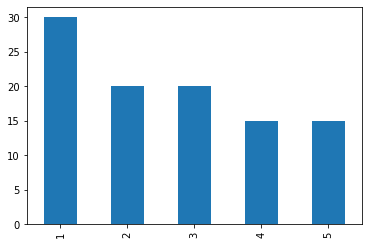

In [109]:
pd.Series(x1).value_counts().plot(kind = 'bar')

In [110]:
skew(x1)

0.319

In [111]:
# 첨도
# 정규분포에 가까울수록 0
# 균일분포에 가까울수록 음수
# scipy.stats.kurtosis(a[, axis, fisher, bias, nan_policy])

x1 = [1]*20 + [2]*20 + [3]*20 + [4]*20 + [5]*20     # 균일
x2 = [1]*10 + [2]*20 + [3]*40 + [4]*20 + [5]*10     # 대칭
x3 = [1]*5 + [2]*15 + [3]*60 + [4]*15 + [5]*5       # 더 뾰족한 대칭

In [112]:
kurtosis(x1)
kurtosis(x2)
kurtosis(x3)

-1.300

-0.500

0.878

### 데이터 시각화
- https://blog.qlik.com/third-pillar-of-mapping-data-to-visualizations-usage

In [114]:
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [116]:
df.english.describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

In [121]:
freq, _ = np.histogram(df['english'], bins=10, range=(0, 100))
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
freq_dist_df = pd.DataFrame({'frequency' : freq}, index = pd.Index(freq_class, name = 'class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [122]:
# 계급값
class_value = [(i+(i+10))/2 for i in range(0, 100, 10)]
class_value

[5.000, 15.000, 25.000, 35.000, 45.000, 55.000, 65.000, 75.000, 85.000, 95.000]

In [123]:
freq_p = freq/len(df['english'])
freq_p

array([0.000, 0.000, 0.000, 0.040, 0.160, 0.320, 0.360, 0.120, 0.000,
       0.000])

In [124]:
# 누적 상대도수
cum_freq_p = np.cumsum(freq_p)
cum_freq_p

array([0.000, 0.000, 0.000, 0.040, 0.200, 0.520, 0.880, 1.000, 1.000,
       1.000])

In [136]:
hist = pd.DataFrame([class_value, freq, freq_p, cum_freq_p]).T
hist.columns = ['class value','frequency', 'relative freq', 'cum relative freq']
hist.index = freq_class
hist

,class value,frequency,relative freq,cum relative freq
0~10,5.0,0.0,0.00,0.00
10~20,15.0,0.0,0.00,0.00
20~30,25.0,0.0,0.00,0.00
30~40,35.0,2.0,0.04,0.04
40~50,45.0,8.0,0.16,0.20
50~60,55.0,16.0,0.32,0.52
60~70,65.0,18.0,0.36,0.88
70~80,75.0,6.0,0.12,1.00
80~90,85.0,0.0,0.00,1.00
90~100,95.0,0.0,0.00,1.00


In [131]:
df1=pd.DataFrame({'Attendance': {0: 60, 1: 100, 2: 80,3: 78,4: 95},
                        'Obtained Marks': {0: 90, 1: 75, 2: 82, 3: 64, 4: 45}})
df1

,Attendance,Obtained Marks
0,60,90
1,100,75
2,80,82
3,78,64
4,95,45


In [132]:
series = df1.idxmax()
series

Attendance        1
Obtained Marks    0
dtype: int64

In [133]:
series = df1.idxmin()
series

Attendance        0
Obtained Marks    4
dtype: int64

In [140]:
hist.loc[hist.frequency.idxmax(), ['class value','frequency']]

class value    65.0
frequency      18.0
Name: 60~70, dtype: float64

In [141]:
x = np.arange(1, 12, 1)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [142]:
np.percentile(x, 25)
np.quantile(x, 0.25)

3.5

3.5

(array([0.000, 0.000, 0.000, 2.000, 8.000, 16.000, 18.000, 6.000, 0.000,
        0.000]),
 array([0.000, 10.000, 20.000, 30.000, 40.000, 50.000, 60.000, 70.000,
        80.000, 90.000, 100.000]),
 <BarContainer object of 10 artists>)

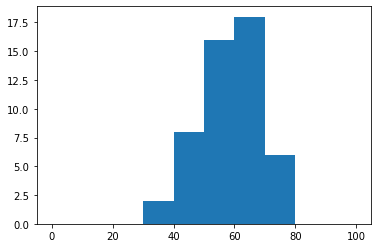

In [145]:
plt.hist(df.english, bins=10, range=(0,100))

{'whiskers': [<matplotlib.lines.Line2D at 0x23ab6e75b20>,
 'caps': [<matplotlib.lines.Line2D at 0x23ab6e85280>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ab6e75790>],
 'medians': [<matplotlib.lines.Line2D at 0x23ab6e859a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ab6e85d30>],
 'means': []}

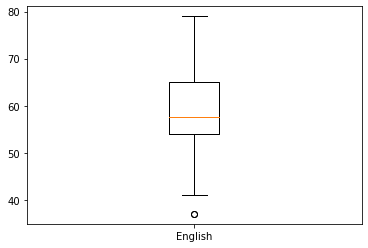

In [147]:
plt.boxplot(df.english, labels=['English'])